# Exploratory Data Analysis
German Credit Data

Group 20

In [184]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# Load the dataset
credit = pd.read_csv('./data/given_german_credit_data.csv',index_col=0) # Please read the csv with 'index_col = 0' configuration to remove unneccesary column

credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [186]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


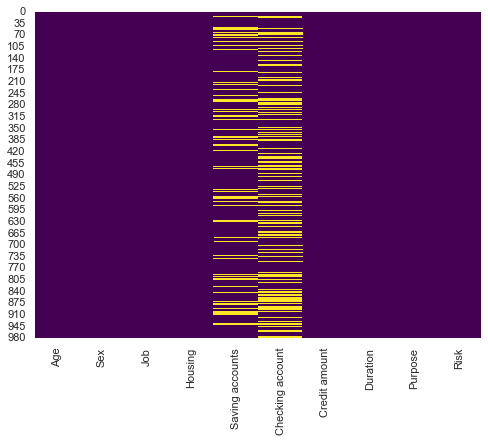

In [187]:
print(credit.isnull().sum())
sns.heatmap(german.isnull(), cbar=False,cmap = 'viridis')

Checking account and credit amount are the variables with the most missing information.
We can adopt four strategies to handle the missing values:

1. Remove the rows with missing values. However, this would lead to much information loss (>= than 39% of the dataset).
1. Fill in the missing value with the mean or median for that feature. The risk of this approach is that it could add bias.
1. Fill the missing values with info from other features (e.g. for males the mean value for males, and for female the mean value for female). This also adds, or at least perpetuates, bias in the data.
1. Predict the msising value with a model like linear regresstion or KNN.


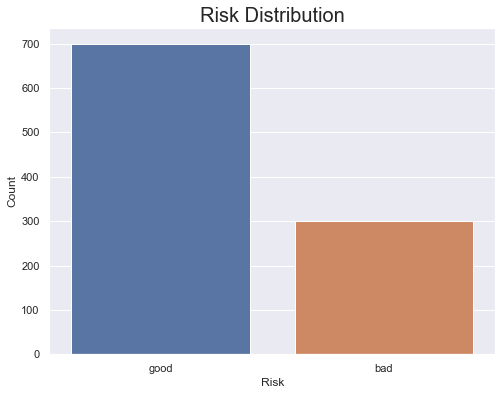

In [99]:
# Target distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Risk",data= credit)                  
g1.set_title("Risk Distribution", fontsize=20)
g1.set_xlabel("Risk")
g1.set_ylabel("Count")
plt.show()

Dataset is not balanced. Oversampling..?

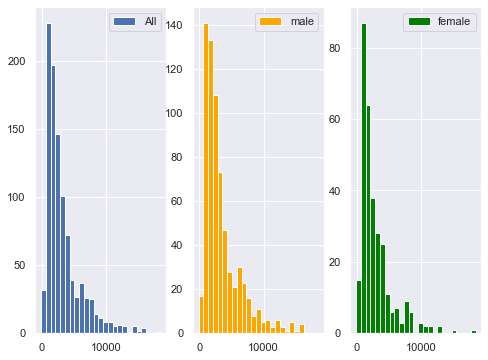

In [87]:
overall = credit['Credit amount'].values  # Total credit amounts
male = credit[credit['Sex'] == 'male']['Credit amount'].values # Credit amounts of male
female = credit[credit['Sex'] == 'female']['Credit amount'].values # Credit amounts of female

plt.subplot(1,3,1)
plt.hist(overall, label="All", bins=25, range=(-100,max(overall)+20))
plt.legend()
plt.subplot(1,3,2)
plt.hist(male, label="male", bins=25, color='orange', range=(-100,max(overall)+20))
plt.legend()
plt.subplot(1,3,3)
plt.hist(female, label="female", bins=25, color='green', range=(-100,max(overall)+20))
plt.legend()

The data is unbalanced: amount of credit distribution for females is more skewed to the left (smaller credit amount).

In [91]:
num_females=sum(credit["Sex"]=="female")
num_males=sum(credit["Sex"]=="male")

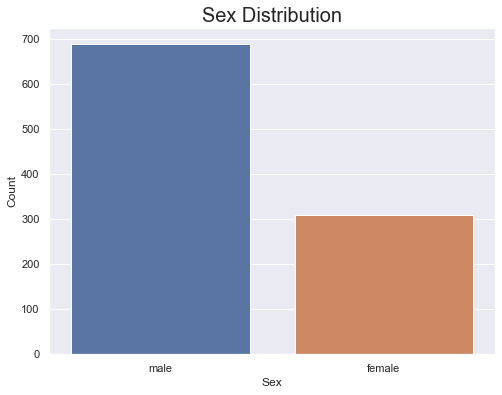

In [130]:
# Target distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Sex",data= credit)                  
g1.set_title("Sex Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Sex")
plt.show()

Mean age good credit: 36
Mean age bad credit:34
Median age good credit: 34.0
Median age bad credit:31.0
The data contains some bias for age: younger people are more often classified as Bad Credit.


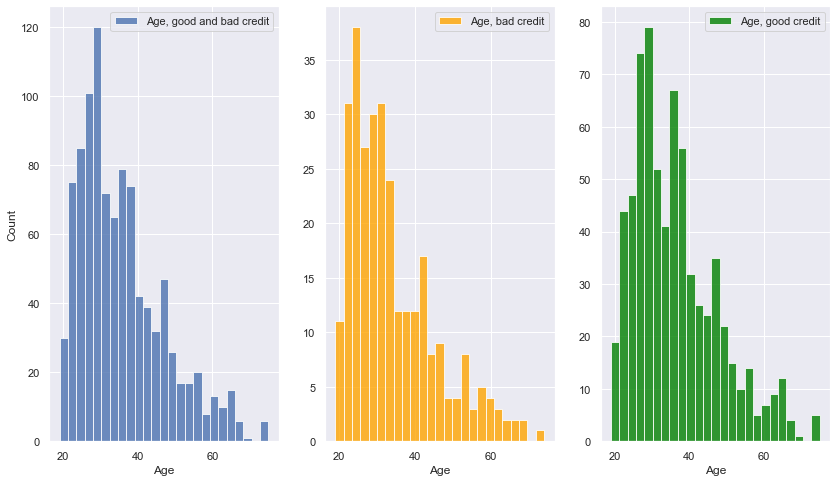

In [166]:
overall_age = credit['Age'].values  # Total credit amounts
good_age = credit[credit['Risk'] == 'good']['Age'].values # Age values filtered for good credit
bad_age = credit[credit['Risk'] == 'bad']['Age'].values # Age values filtered for bad credit

print(f'Mean age good credit: {round(sum(good_age)/len(good_age))}')
print(f'Mean age bad credit:{round(sum(bad_age)/len(bad_age))}')
print(f'Median age good credit: {np.median(good_age)}')
print(f'Median age bad credit:{np.median(bad_age)}')

print("The data contains some bias for age: younger people are more often classified as Bad Credit.")

plt.subplot(1,3,1)
plt.hist(overall_age, label="Age, good and bad credit", bins=25, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend()
plt.subplot(1,3,2)
plt.hist(bad_age, label="Age, bad credit", bins=25, color='orange', alpha=0.8)
plt.xlabel("Age")
plt.legend()
plt.subplot(1,3,3)
plt.hist(good_age, label="Age, good credit", bins=25, color='green', alpha=0.8)
plt.xlabel("Age")
plt.legend()
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Support for multi-dimensional indexing 

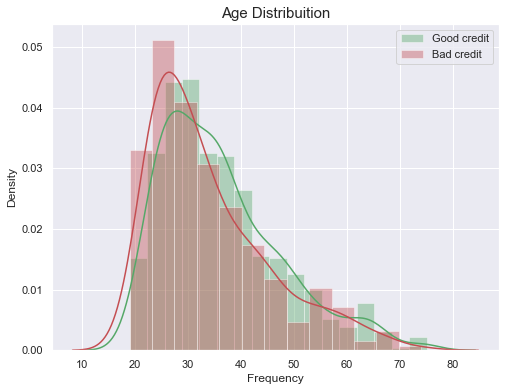

In [200]:
g1 = sns.distplot(good_age, color="g", label="Good credit")
g1 = sns.distplot(bad_age, color='r', label="Bad credit")
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")
plt.legend()
plt.show()

In [171]:
# Create dummy variables to look at a correlation plot
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [177]:
df_credit = credit

df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)


In [178]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

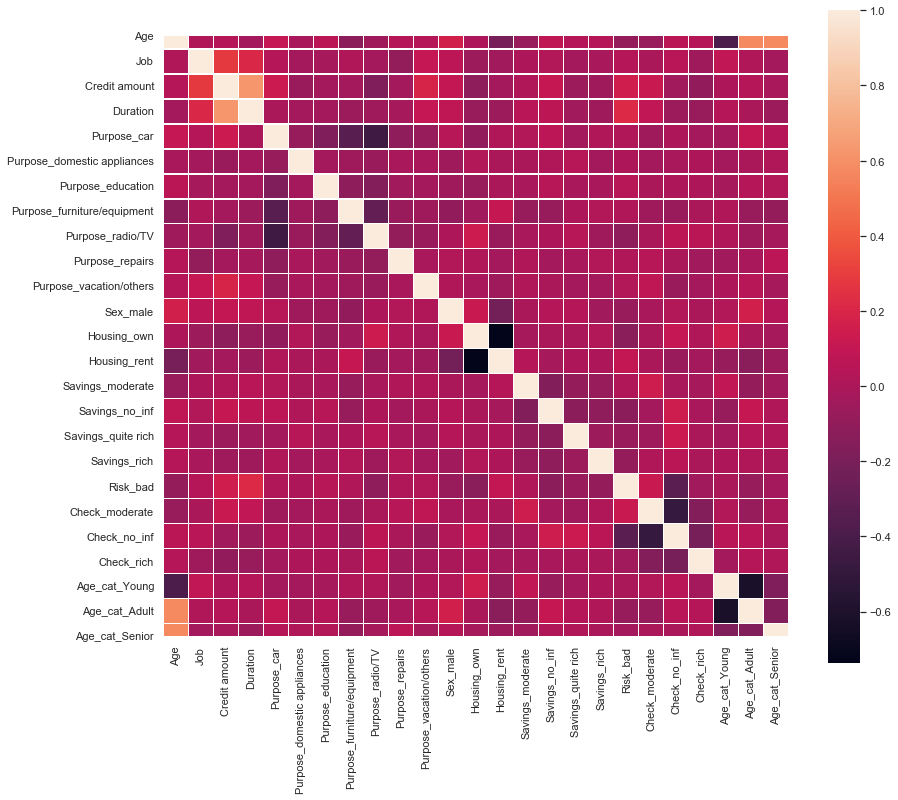

In [180]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white')
plt.show()